In [3]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL, Task, URIRef

In [4]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [5]:
jasper.service()

In [6]:
Stream(url="http://shapestream:4000/shapes")

In [7]:
jasper.tasks()

[]

In [8]:
qid  = "shapecount"
tbox = "https://raw.githubusercontent.com/riccardotommasini/colorwave/master/blocks.owl"
frmt = "JSON"
body ="""
        SELECT (COUNT(?r) as ?numShapes)
        FROM NAMED WINDOW <rw> ON <http://shapestream:4000/shapes> [RANGE PT15S STEP PT5S]
        WHERE {
                WINDOW ?rw { ?r a <http://www.streamreasoning.org/ontologies/2018/9/shapes#Triangle> .}
            }
      """

In [9]:
redcount_query = jasper.create(qid, body, tbox, frmt)


In [10]:
redcount_query

In [11]:
task = jasper.getq(qid)
task

In [12]:
task.stream()

In [22]:
task.sources()

[GET http://shapestream:4000/shapes]

In [24]:
task.stream().endpoints()

[GET http://jasper:8182/jasper/streams/shapecount/observers/203743149]

# The stream has no endpoint. 

In [15]:
redcount_stream.endpoints()

[]

In [16]:
# We need to expose it!

In [17]:
r = jasper.expose(qid, 'HTTP', retention=5)
r

In [21]:
redcount_stream.endpoints()

[]

IndexError: list index out of range

In [27]:
endpoint = task.stream().endpoints()[0]

In [28]:
resp = endpoint.call()
resp

In [30]:
df = resp.flatten()

In [32]:
df = df.dataframe(['results_bindings_0_numShapes_value'])

In [33]:
df

,head_vars_0,results_bindings_0_numShapes_datatype,results_bindings_0_numShapes_type,results_bindings_0_numShapes_value
0,numShapes,http://www.w3.org/2001/XMLSchema#integer,literal,1
1,numShapes,http://www.w3.org/2001/XMLSchema#integer,literal,1
2,numShapes,http://www.w3.org/2001/XMLSchema#integer,literal,1
3,numShapes,http://www.w3.org/2001/XMLSchema#integer,literal,1
4,numShapes,http://www.w3.org/2001/XMLSchema#integer,literal,1


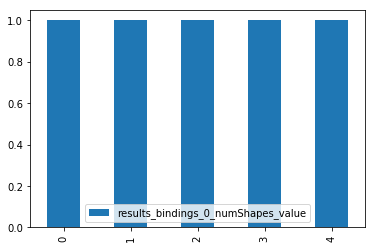

In [34]:
% matplotlib inline
df.plot(kind='bar')

In [28]:
jasper.delete(qid)